In [1]:
import numpy as np
import data_utils

from models import *

import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
model = torch.load('trained_model_data/TransformerModel5.pt', map_location=torch.device('cpu'))

seq_len = 50
target_offset = 25
step_size = 10
dataset = data_utils.generate_data_from_hdf_folder("../../humoro/mogaze/", seq_len, target_offset, step_size)

sample_attention = model.model.encoder.layers[0].self_attn

print(sample_attention)

sample_attention_attn = sample_attention.attn
sample_attention_linears = sample_attention.linears

print(sample_attention_attn[-1].shape)

print(sample_attention_linears[-1].weight)


MultiHeadAttention(
  (linears): ModuleList(
    (0): Linear(in_features=512, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=512, bias=True)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): Linear(in_features=512, out_features=512, bias=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
)
torch.Size([8, 50, 50])
Parameter containing:
tensor([[-0.0989, -0.0679, -0.0254,  ..., -0.0107, -0.0355,  0.0198],
        [-0.0529,  0.0107,  0.0245,  ..., -0.0204,  0.0333, -0.0366],
        [-0.0829,  0.1316,  0.1065,  ...,  0.0379, -0.0688, -0.1450],
        ...,
        [-0.1003, -0.0297,  0.0946,  ...,  0.0542, -0.0440, -0.0282],
        [-0.0594,  0.0536,  0.0495,  ..., -0.0109, -0.1294,  0.0612],
        [-0.0427, -0.0107,  0.0896,  ..., -0.0110,  0.0014, -0.0448]],
       requires_grad=True)


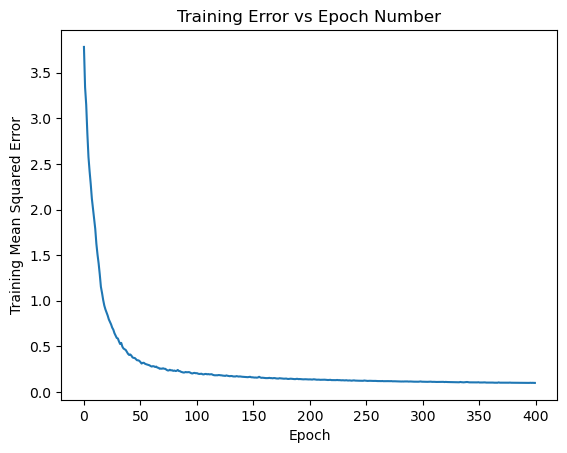

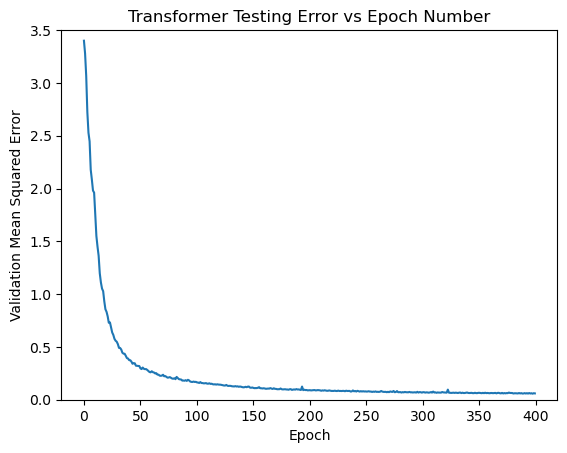

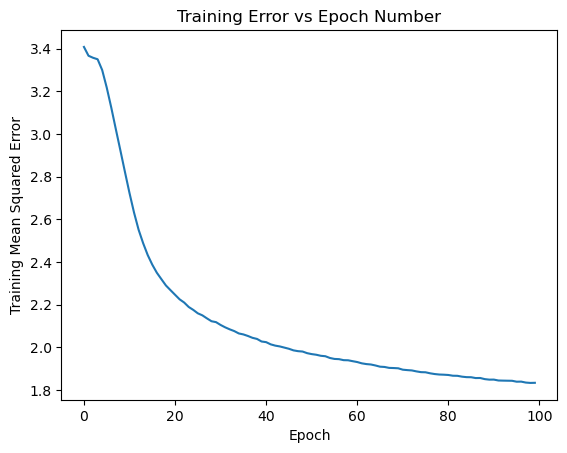

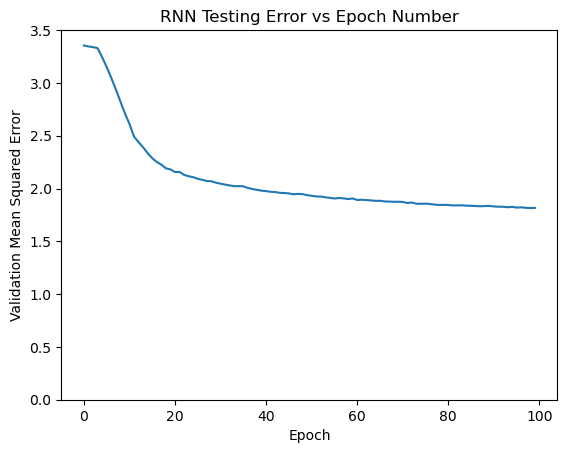

In [4]:

epoch_losses = np.loadtxt('trained_model_data/epoch_losses.gz')
epoch_x = list(range(len(epoch_losses)))
evaluations = np.loadtxt('trained_model_data/evaluations.gz')
evaluations_x = list(range(len(evaluations)))



plt.plot(epoch_losses)
plt.title("Training Error vs Epoch Number")
plt.xlabel("Epoch")
plt.ylabel("Training Mean Squared Error")
plt.show()

plt.plot(evaluations)
plt.title("Transformer Testing Error vs Epoch Number")
plt.xlabel("Epoch")
plt.ylabel("Validation Mean Squared Error")
plt.ylim(top=3.5, bottom=0)
plt.show()


epoch_losses_RNN = np.loadtxt('trained_model_data/epoch_losses_RNN.gz')
evaluations_RNN = np.loadtxt('trained_model_data/evaluations_RNN.gz')

plt.plot(epoch_losses_RNN)
plt.title("Training Error vs Epoch Number")
plt.xlabel("Epoch")
plt.ylabel("Training Mean Squared Error")
plt.show()

plt.plot(evaluations_RNN)
plt.title("RNN Testing Error vs Epoch Number")
plt.xlabel("Epoch")
plt.ylabel("Validation Mean Squared Error")
plt.ylim(top=3.5, bottom=0)
plt.show()


In [4]:
from train_utils import evaluate_masks, evaluate_stupid, evaluate_standard
from torch.utils.data import DataLoader
from individual_TF import IndividualTF
import time

data_subsets = torch.utils.data.random_split(dataset, [100, 200, 400, 800, 1600, 3200, len(dataset)-6300])
data_loaders = [DataLoader(data_subset, batch_size=64, num_workers=0, shuffle=True) for data_subset in data_subsets]

criterion = F.mse_loss

# model1 = torch.load('trained_model_data/TransformerModel5.pt', map_location="cpu")
model2 = torch.load('trained_model_data/EncoderDecoderModel.pt', map_location=torch.device('cpu'))
model3 = torch.load('trained_model_data/GRU.pt', map_location=torch.device('cpu'))

# joint_dims = 66
# model = IndividualTF(enc_inp_size=joint_dims*2, dec_inp_size=(joint_dims*2)+(joint_dims//3), dec_out_size=joint_dims*2, device=device)
# model.load_state_dict(model1.state_dict())

# for parameter in model1.parameters():
#     parameter = parameter.to(torch.device('cpu'))
#     # print(parameter.to(torch.device('cpu')))
    
# print(model.cuda())


eval1 = []
eval2 = []
eval3 = []

time1 = []
time2 = []
time3 = []
for data_loader in data_loaders[:-1]:
    # start = time.process_time()
    # e1 = evaluate_masks(model1, data_loader, criterion, torch.device('cpu'))
    # end = time.process_time()
    # time1.append(end-start)
    # eval1.append(e1)

    start = time.process_time()
    e2 = evaluate_stupid(model2, data_loader, criterion, torch.device('cpu'))
    end = time.process_time()
    time2.append(end-start)
    eval2.append(e2)

    start = time.process_time()
    e3 = evaluate_standard(model3, data_loader, criterion, torch.device('cpu'))
    end = time.process_time()
    time3.append(end-start)
    eval3.append(e3)

print(time1)
print(time2)
print(time3)

print(eval1)
print(eval2)
print(eval3)



[]
[2.111623999999999, 3.360427999999999, 6.7980540000000005, 13.405099, 26.381020999999997, 54.516205]
[0.4143769999999982, 0.8563589999999976, 1.377481000000003, 2.5751029999999986, 7.5736869999999925, 16.747066999999987]
